In [30]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

In [3]:
def show_image(img, title='Imagem'):   
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [5]:
def _imagem_cinza(caminho_imagem):
    #Leitura da imagem em escala de cinza
    imagem_gray = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)

    #Conversão para imagem BGR
    imagem_bgr = cv2.cvtColor(imagem_gray, cv2.COLOR_GRAY2BGR)

    #Conversão para o espaço de cor HSV
    imagem_hsv = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2HSV)

    # Aumento da saturação
    # Pegue o canal de saturação (S)
    h, s, v = cv2.split(imagem_hsv)
    # Aumente a saturação (por exemplo, multiplicando por 2, com cuidado para não estourar os valores máximos de 255)
    s = cv2.multiply(s, 10)
    s = np.clip(s, 0, 255)  # Certifique-se de que os valores estejam no intervalo [0, 255]

    # Recombine os canais
    imagem_hsv_mod = cv2.merge([h, s, v])

    # Conversão de volta para BGR
    return cv2.cvtColor(imagem_hsv_mod, cv2.COLOR_HSV2BGR)

In [25]:
caminho_imagem = "imagem_para_texto/00026903_in.jpg"

imagem_original = cv2.imread(caminho_imagem)
imagem_ajustada = cv2.convertScaleAbs(imagem_original, alpha=.75, beta=1.5)
imagem_cinza = _imagem_cinza(caminho_imagem)

imagem_ocr = cv2.imread(caminho_imagem)

(-0.5, 840.5, 548.5, -0.5)

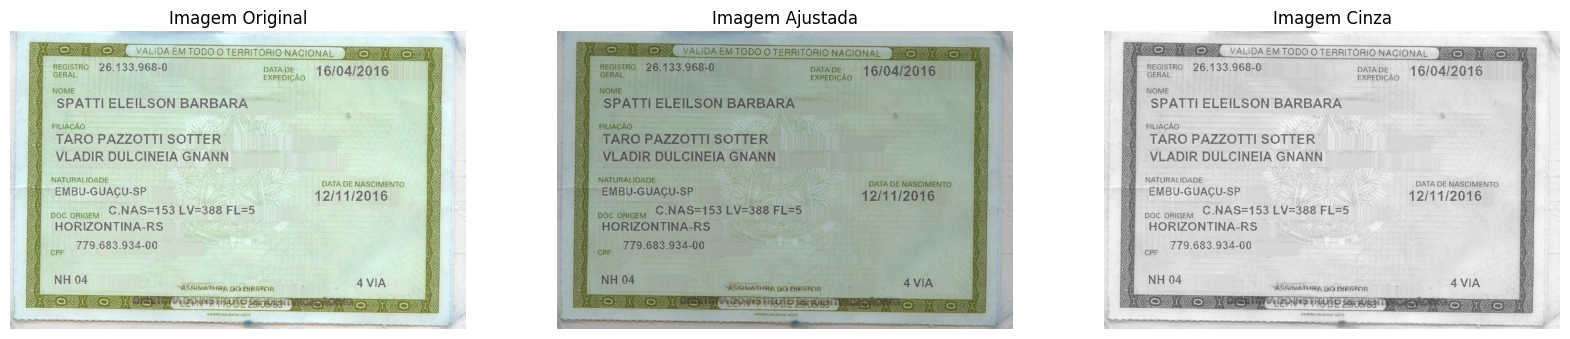

In [21]:
# Cria uma figura e eixos
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plota as imagens nos eixos
axs[0].imshow(imagem_original)
axs[0].set_title('Imagem Original')

axs[1].imshow(imagem_ajustada)
axs[1].set_title('Imagem Ajustada')

axs[2].imshow(imagem_cinza)
axs[2].set_title('Imagem Cinza')

# Remove os eixos
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

In [8]:
reader = easyocr.Reader(['pt'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [26]:
results = reader.readtext(imagem_ocr)

In [27]:
for (bbox, text, prob) in results:
    # Desenhar bounding box ao redor do texto detectado
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    top_right = tuple(map(int, top_right))
    bottom_right = tuple(map(int, bottom_right))
    bottom_left = tuple(map(int, bottom_left))

    cv2.rectangle(imagem_ocr, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(imagem_ocr, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    print(f'Texto: {text}, Probabilidade: {prob:.2f}')

Texto: VALIDA EMTODO O TERRITORIQ NACIONAL, Probabilidade: 0.79
Texto: REGISTRO, Probabilidade: 1.00
Texto: '26.133.968-0, Probabilidade: 0.53
Texto: DATA DE, Probabilidade: 0.91
Texto: 16/04/2016, Probabilidade: 1.00
Texto: GERAL, Probabilidade: 1.00
Texto: EXPEDIÇAO, Probabilidade: 0.41
Texto: NOME, Probabilidade: 1.00
Texto: SPATTI ELEILSON BARBARA, Probabilidade: 0.68
Texto: FILIACÃO, Probabilidade: 0.63
Texto: TARO PAZZOTTI SOTTER, Probabilidade: 0.90
Texto: VLADIR DULCINEIA GNANN, Probabilidade: 0.77
Texto: NATURALIDADE, Probabilidade: 0.75
Texto: DATA DE NASCIMENTO, Probabilidade: 0.99
Texto: EMBU-GUAÇU-SP, Probabilidade: 1.00
Texto: 12/11/2016, Probabilidade: 0.99
Texto: C.NAS=153 LV=388 FL=5, Probabilidade: 0.70
Texto: DOC ORIGEM, Probabilidade: 0.72
Texto: HORIZONTINA-RS, Probabilidade: 0.93
Texto: 779.683.934-00, Probabilidade: 0.90
Texto: CPF, Probabilidade: 0.99
Texto: NH 04, Probabilidade: 0.94
Texto: 4 VIA, Probabilidade: 0.81
Texto: ASSinaFhrA Dodirftoa, Probabilidade: 

(-0.5, 840.5, 548.5, -0.5)

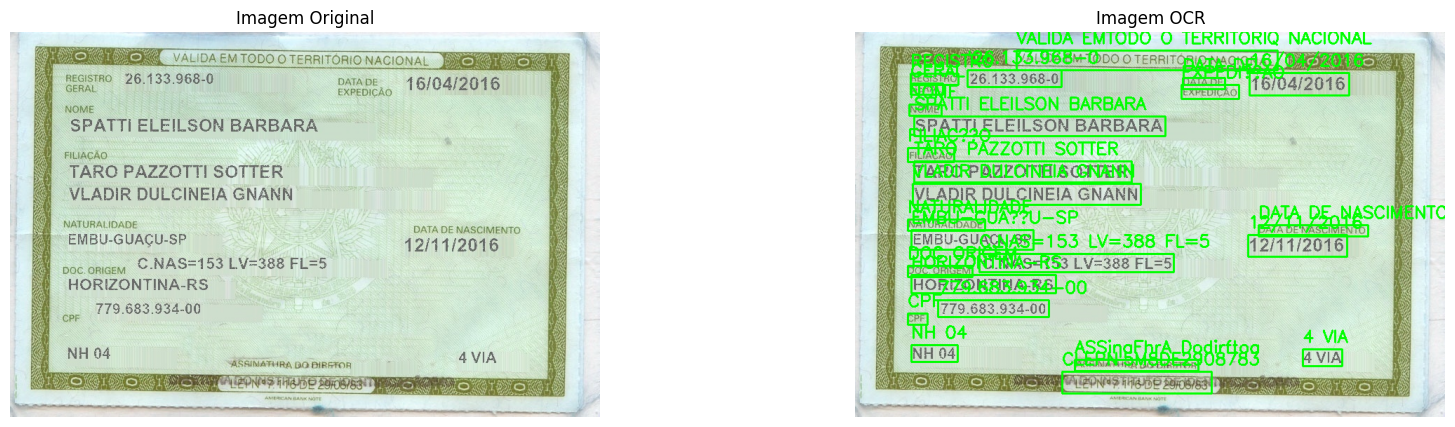

In [28]:
# Cria uma figura e eixos
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Plota as imagens nos eixos
axs[0].imshow(imagem_original)
axs[0].set_title('Imagem Original')

axs[1].imshow(imagem_ocr)
axs[1].set_title('Imagem OCR')


# Remove os eixos
axs[0].axis('off')
axs[1].axis('off')

In [32]:
modelo_yolo = YOLO("imagem_para_texto/yolov8m_rgverso_20240522.pt")

results = modelo_yolo([caminho_imagem])


0: 448x640 1 nome_pessoa, 1 rg, 1 cpf, 1 data_nascimento, 1 data_expedicao, 319.1ms
Speed: 3.1ms preprocess, 319.1ms inference, 54.4ms postprocess per image at shape (1, 3, 448, 640)


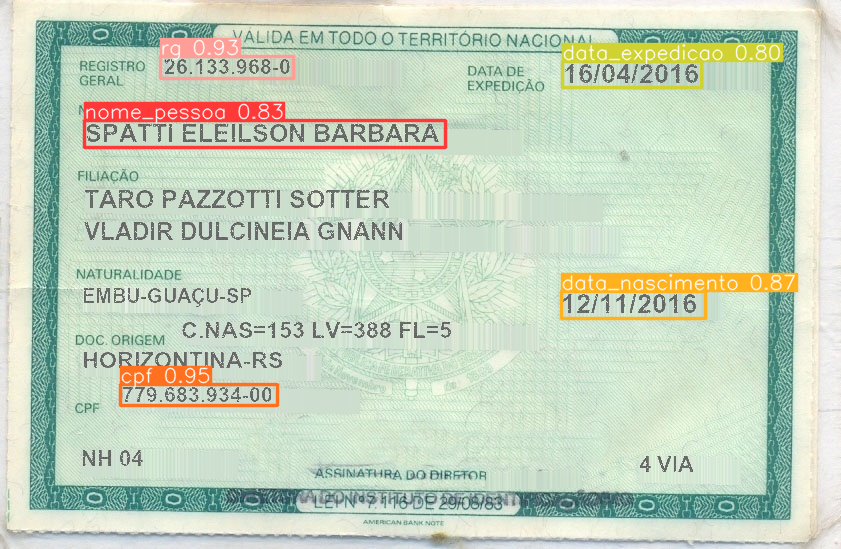

In [68]:
objetos_detectados = []
for result in results:    
    boxes = result.boxes    
    
    for box in boxes:
        class_id = int(box.cls.item())
        x1, y1, x2, y2 = box.xyxy.numpy()[0].astype(int)
        cropped_image = imagem_original[y1:y2, x1:x2]
        
        objetos_detectados.append(cropped_image)
        
    result.show()

In [77]:
cpf = reader.readtext(objetos_detectados[0])[0][1]
rg = reader.readtext(objetos_detectados[1])[0][1]
data_nascimento = reader.readtext(objetos_detectados[2])[0][1]
nome = reader.readtext(objetos_detectados[3])[0][1]
data_expedicao = reader.readtext(objetos_detectados[4])[0][1]

In [81]:
print(f"""
    Nome: {nome}
    CPF: {cpf}
    RG: {rg}
    Data de Nascimento: {data_nascimento}
    Data de Expedição: {data_expedicao}
""")


    Nome: SPATTI ELEILSON BARBARA
    CPF: 779.683.934-00
    RG: 26.133.968-0
    Data de Nascimento: 12/11/2016
    Data de Expedição: 16/04/2016

